In [1]:
import torch
import utils as u
import pathlib
from models import Generator, Discriminator
import re
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
checkpoints_path = pathlib.Path('./models/').glob('*.pt')
checkpoints_path = [str(cp) for cp in checkpoints_path if str(cp).find('Generator') != -1]
checkpoints_path

['models/Generator_1_layer.pt',
 'models/Generator_2_layer.pt',
 'models/Generator_3_layer.pt',
 'models/Generator_4_layer.pt']

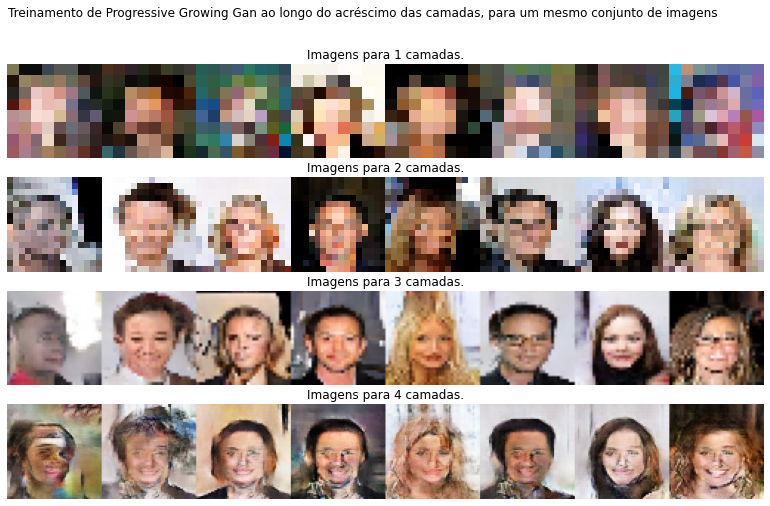

In [8]:
nrow = 8
noise = u.get_noise(b_size=nrow, noise_dim=100)

plt.figure(figsize=(25, 8))
n = len(checkpoints_path)

images = []
for k, cp in enumerate(checkpoints_path):
    layer = int(re.findall(r'[0-9]{1,}', cp)[0])
    checkpoint = torch.load(cp, map_location=torch.device('cpu'))
    noise_dim, cfl = checkpoint['noise_dim'], checkpoint['cfl'], 
    print (f'Instanciando e carregando generator com {layer} camadas.')
    generator = Generator(img_channels=3, noise_dim=noise_dim, n_camadas=layer, cfl=cfl)
    generator.load_checkpoint(cp)
    generator.eval()
    img_tensor = generator(noise)

    plt.subplot(n, 1, k+1)
    img_np = u.criar_grid(img_tensor, nrow, None, tipo='np')
    plt.imshow(img_np)
    plt.title('')
    plt.axis('off')
    plt.title(f'Imagens para {layer} camadas.')

clear_output(wait=True)
plt.suptitle('Treinamento de Progressive Growing Gan ao longo do acréscimo das camadas, para um mesmo conjunto de imagens')
plt.show()